<div style="text-align: center;">
  <span style="color:#809bd8; font-size: 24px; font-weight: bold;">Institución Universitaria Digital de Antioquia</span>
  <br>
  <img src="https://imgur.com/KUMa2uy.png" alt="DataFrame frutas" style="max-width: 20%; height: auto;">
</div>

---
**<span style="color:#809bd8">Evidencia de Aprendizaje:</span>** S25 - Evidencia de aprendizaje: Informe de análisis de problema para la implementación de la red neuronal

**<span style="color:#809bd8">Asignatura:</span>** Principios de Deep Learning y Redes Neuronales

**<span style="color:#809bd8">Estudiante:</span>** Jean Carlos Páez Ramírez

**<span style="color:#809bd8">Grupo:</span>** PREICA2501B020140

**<span style="color:#809bd8">Docente:</span>** Sharon Karin Camacho Guzman (Ingeniera Administradora Especialista en ingeniería Financiera de la Universidad Nacional de Colombia)

**<span style="color:#809bd8">Fecha:</span>** 29 de mayo de 2025


## Parte 1: Análisis de Problema con Red Neuronal Recurrente (RNN)  
### Caso: Análisis de sentimiento en comentarios de productos

**Contexto**  
Una empresa de marketing digital desea analizar los comentarios de sus usuarios para identificar si son positivos o negativos. Esto permitirá orientar campañas y estrategias de ventas basadas en la percepción del cliente.

**Objetivo del modelo:**  
Construir un clasificador de sentimientos basado en RNN que permita categorizar comentarios de texto como **positivos** o **negativos**.



### 1.1 Datos de Entrada y Salida
- **Datos de entrada:** Comentarios de texto de usuarios (ej. "Muy buen producto", "No me gustó nada", etc.)
- **Salida esperada:** Una etiqueta binaria: `1` para positivo, `0` para negativo.



### 1.2 Diagrama de bloques de la solución RNN

Realizado por mi con Draw.io: https://drive.google.com/file/d/1j1Z7W2nr0DYfj4Ps1sBRbPp3MuIi9tKy/view?usp=sharing

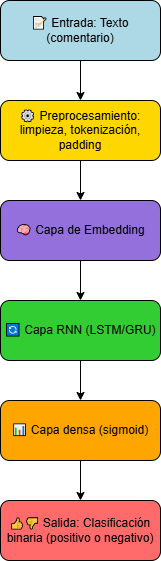


### 1.3 Desafíos Técnicos y Soluciones

**Desafío 1:** Los comentarios pueden ser muy variados y con errores ortográficos.  
**Solución:** Usar técnicas robustas de limpieza y usar `word embeddings` preentrenados como GloVe o FastText.

**Desafío 2:** Entrenamiento lento con secuencias largas.  
**Solución:** Limitar la longitud de los comentarios y usar GRU (más ligera que LSTM) o incluso RNN bidireccionales para mejorar rendimiento sin afectar mucho la precisión.



## Parte 2: Análisis Teórico con CNN (Dataset MNIST)

### 2.1 a. ¿Cuáles son los datos de entrada y salida del problema?
- **Entrada:** Imágenes de dígitos manuscritos (28x28 píxeles en escala de grises).
- **Salida:** Una etiqueta entre `0` y `9`.

### 2.1 b. ¿Por qué CNN es adecuada para resolverlo?
Las CNN son ideales para imágenes ya que:
- Detectan patrones espaciales como bordes o curvas.
- Reducen la dimensionalidad manteniendo características importantes.
- Son muy eficaces en clasificación de imágenes.

### 2.1 c. Diagrama de bloques

Realizado por mi con Draw.io: https://drive.google.com/file/d/1apn3AlQVq4SPa-lMOdd9M5p2E8hDhx8p/view?usp=sharing

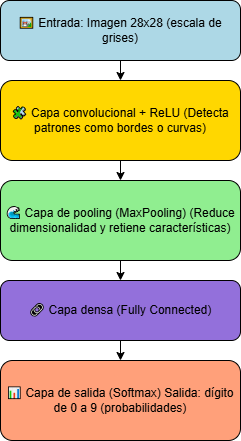

### 2.1 d. Desafíos técnicos y soluciones

**Desafío 1:** Sobreajuste en modelos pequeños.  
**Solución:** Aplicar técnicas como Dropout o aumento de datos.

**Desafío 2:** Datos no balanceados o ruido en la imagen.  
**Solución:** Normalización y limpieza del dataset, y aplicar regularización.



## Parte 2.2: Prototipo funcional CNN con MNIST
Modelo CNN sencillo con:
- 1 capa convolucional
- 1 capa de pooling
- 1 capa fully connected
- ReLU y Softmax


In [4]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Cargar el dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización y reshape para CNN
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Modelo CNN
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8899 - loss: 0.3621 - val_accuracy: 0.9739 - val_loss: 0.0820
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9789 - loss: 0.0680 - val_accuracy: 0.9824 - val_loss: 0.0545
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9840 - val_loss: 0.0478
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9861 - val_loss: 0.0453
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9929 - loss: 0.0223 - val_accuracy: 0.9866 - val_loss: 0.0410



## Resultados del Modelo CNN


In [5]:

# Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en prueba: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9834 - loss: 0.0512
Precisión en prueba: 0.9866


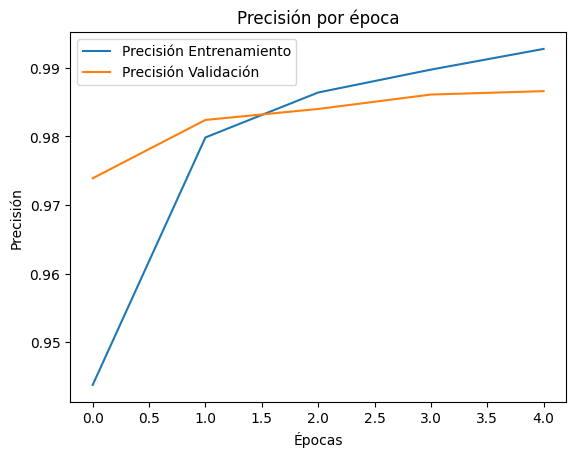

In [7]:

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión por época')
plt.show()


### **Interpretación del gráfico: precisión por época**



1.   **Aumento constante:** Ambas curvas suben a medida que avanzan las épocas, el modelo está aprendiendo bien.
2.   **Precisión alta y estable:** Al final de la quinta época, la precisión en validación se acerca al 98.5%, y en entrenamiento al 99.4%, lo cual es excelente.
3. **Diferencia entre las curvas:**
    *   La diferencia entre entrenamiento y validación es pequeña, lo que indica que no hay sobreajuste significativo.
    *   Si la curva azul estuviera muy por encima de la naranja, sería una señal de overfitting (el modelo aprende demasiado bien los datos de entrenamiento y falla con datos nuevos).


## Comparación con la Evidencia de ML (EA4)

- En el trabajo de ML (EA4) del  implementé redes neuronales desde cero, Scikit-learn y Keras.
- Este nuevo modelo CNN logra una precisión de **98,66%** en validación.
- El uso de convoluciones mejora la extracción de patrones espaciales respecto a modelos MLP.
- Comparado con EA4:
  - **Desde cero:** 97.52%
  - **Scikit-learn:** ~96.49%
  - **Keras (MLP):** ~97.90%
  - **CNN (este ejercicio):** 98,66%



##  Conclusión Final y Recomendaciones

A través de esta evidencia de aprendizaje, se comprobó que la arquitectura **Convolutional Neural Network (CNN)** es altamente efectiva para tareas de clasificación de imágenes como MNIST, superando en precisión a enfoques anteriores basados en redes MLP (implementadas desde cero, con Scikit-learn y Keras).

La CNN alcanzó una **precisión de 98.66%** en validación, evidenciando su capacidad para aprender representaciones espaciales complejas. Este rendimiento la convierte en la opción ideal para tareas de visión por computadora. Por otro lado, las redes **recurrentes (RNN)** siguen siendo más adecuadas para datos secuenciales como texto, donde el contexto y el orden de las palabras importan.



### Recomendaciones:

**Para mejorar el modelo:**
- Probar arquitecturas más profundas con múltiples capas convolucionales.
- Aplicar técnicas como *Dropout*, *batch normalization* o *data augmentation* para reducir el sobreajuste.

**Para expandir el proyecto:**
- Evaluar el modelo con otros datasets de imágenes, como *Fashion-MNIST* o *CIFAR-10*.
- Implementar una interfaz de usuario simple que permita probar el modelo con imágenes reales escritas por el usuario.

**Aprendizaje personal:**
- Esta experiencia fortaleció el entendimiento de las diferencias entre las arquitecturas **CNN y RNN**, así como su aplicación a distintos tipos de datos (*imágenes vs. texto*).

Para terminar esta actividad, puedo concluir que: seleccionar la arquitectura adecuada es clave para el éxito de un proyecto de deep learning, y este trabajo ha demostrado cómo hacerlo de forma fundamentada y efectiva.

Le doy gracias a la profe Sharon por adentrarnos en este maravilloso mundo de como funciona deep learning, saludos mi profe.